# Bankfull Width - Model 1

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import Scatter_Violin_Plots, Performance_metrics, Hbar

## Import dataset

In [2]:
# Import the training dataset
train = pd.read_csv('./DataPreProcessing/df_Train.csv', converters={'site_no': str}, low_memory=False)

# Import the testing dataset
test = pd.read_csv('./DataPreProcessing/df_Test.csv', converters={'site_no': str}, low_memory=False)

## Split dataset into train and test sets

In [3]:
# Spliting the dependent (y) variable and independent (X) variables for training dataset
y_train = train[['stream_wdth_va_bnk']]
X_train = train[['q_va_bnk', 'TotDASqKM', 'CAT_EVI_OND_2011', 'CAT_EVI_AMJ_2012',
                 'CAT_EVI_JAS_2012', 'CAT_EVI_JFM_2012', 'ACC_NDAMS2010', 'CAT_POPDENS10', 'StreamOrde',
                 'D50_mm_', 'Mean_AI', 'NLCD_Developed_%', 'NLCD_Forest_%', 'NLCD_Agriculture_%', 
                 'MINELEVSMO', 'SLOPE', 'CAT_SILTAVE', 'CAT_CLAYAVE','CAT_SANDAVE']]

# Spliting the dependent (y) variable and independent (X) variables for testing dataset 
y_test = test[['stream_wdth_va_bnk']]
X_test = test[['q_va_bnk', 'TotDASqKM', 'CAT_EVI_OND_2011', 'CAT_EVI_AMJ_2012',
               'CAT_EVI_JAS_2012', 'CAT_EVI_JFM_2012', 'ACC_NDAMS2010', 'CAT_POPDENS10', 'StreamOrde',
               'D50_mm_', 'Mean_AI', 'NLCD_Developed_%', 'NLCD_Forest_%', 'NLCD_Agriculture_%', 
               'MINELEVSMO', 'SLOPE', 'CAT_SILTAVE', 'CAT_CLAYAVE','CAT_SANDAVE']]

## Multi-Linear Regression Model

In [4]:
# MLR coefficients obtained through JMP software
Intercept = 0.72883
q_va_bnk_coeff = 0.28562
TotDASqKM_coeff = 0.18352
Mean_AI_coeff = 0.31169
D50_mm_coeff = 0.03040
NLCD_Agriculture_coeff = -0.01974
CAT_SILTAVE_coeff = -0.08179

In [5]:
# Make prediction on training dataset using final MLR model
mlr_pred_train = (10**Intercept) * (X_train['q_va_bnk']**q_va_bnk_coeff) * (X_train['TotDASqKM']**TotDASqKM_coeff) *(X_train['Mean_AI']**Mean_AI_coeff) * (X_train['D50_mm_']**D50_mm_coeff) * (X_train['NLCD_Agriculture_%']**NLCD_Agriculture_coeff) * (X_train['CAT_SILTAVE']**CAT_SILTAVE_coeff)
mlr_pred_train = np.array(mlr_pred_train).reshape(-1,)
mlr_pred_log_train = np.array(np.log10(mlr_pred_train)).reshape(-1,) #log transform

# Make prediction on testing dataset using final MLR model
mlr_pred_test = (10**Intercept) * (X_test['q_va_bnk']**q_va_bnk_coeff) * (X_test['TotDASqKM']**TotDASqKM_coeff) *(X_test['Mean_AI']**Mean_AI_coeff) * (X_test['D50_mm_']**D50_mm_coeff) * (X_test['NLCD_Agriculture_%']**NLCD_Agriculture_coeff) * (X_test['CAT_SILTAVE']**CAT_SILTAVE_coeff)
mlr_pred_test = np.array(mlr_pred_test).reshape(-1,)
mlr_pred_log_test = np.array(np.log10(mlr_pred_test)).reshape(-1,) #log transform

## Observation

In [6]:
y_test1 = np.array(y_test).reshape(-1,)
y_test_log = np.array(np.log10(y_test1)).reshape(-1,) #log transform

y_train1 = np.array(y_train).reshape(-1,)
y_train_log = np.array(np.log10(y_train1)).reshape(-1,) #log transform

## Validation through Performance Metrics

In [7]:
Metrics = pd.DataFrame()
Model_names = [ 'Train', 'Test']
pred_list= [mlr_pred_train, mlr_pred_test]
obs_list = [y_train1, y_test1]

for i in range(0,2):
    X = obs_list[i]
    Y = pred_list[i]
    df = pd.DataFrame({f'{Model_names[i]}': [ format(Performance_metrics(X, Y, "Yes")[0], ".2f"), format(Performance_metrics(X, Y, "Yes")[1], ".2f"), format(Performance_metrics(X, Y, "Yes")[2], ".2f"), format(Performance_metrics(X, Y, "Yes")[3], ".2f"), format(Performance_metrics(X, Y, "Yes")[4], ".2f")]})
    Metrics= pd.concat([df, Metrics], axis=1)

Metrics = Metrics.rename( index={  0:'R\N{SUPERSCRIPT TWO}', 1:'NSE', 2:'KGE', 3:'APB (%)',  4:'RMSE (cms)'})
Metrics.style

,Test,Train
R²,0.84,0.69
NSE,0.82,0.69
KGE,0.75,0.72
APB (%),27.65,28.91
RMSE (cms),35.02,54.63


## Visualization of Scatter and Violin Plots for Training and Testing Datasets

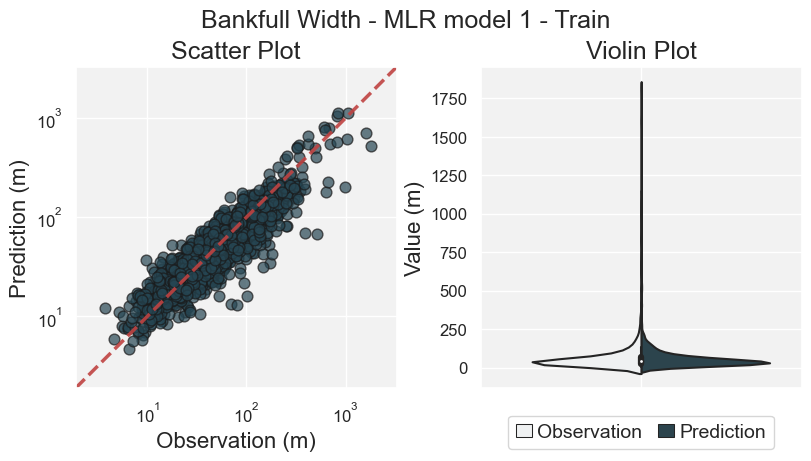

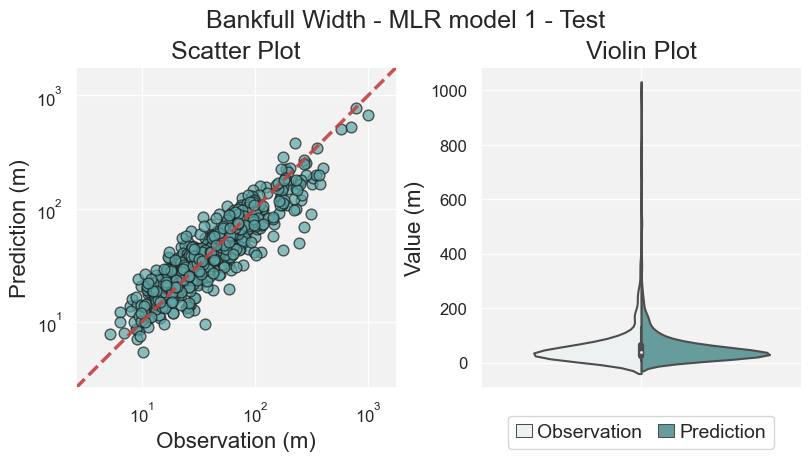

In [8]:
Title = ['Bankfull Width - MLR model 1 - Train', 'Bankfull Width - MLR model 1 - Test']
fc = ['#264653', '#5DA5A5']
pred_list= [mlr_pred_train, mlr_pred_test]
obs_list = [y_train1, y_test1]

for i in range (0,2):
    X = obs_list[i]
    Y = pred_list[i]
    Scatter_Violin_Plots(X, Y, "Observation (m)", "Prediction (m)", "Value (m)", Title[i], fc[i])